In [2]:
import pandas as pd
import numpy as np

subpath = "agg_function_periodic_experiment_y_original_tptt/2024-12-04T17:03:31"
data = pd.read_csv(f'{subpath}/total_X.csv')


In [3]:
data.drop(columns=['Unnamed: 7'], inplace=True)

In [4]:
group = data.groupby(["período", "função", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [5]:
group['std'] = round(100* group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [6]:
group

,período,função,método,mean,std
0,2,máximo,RF,10.0,2.0
1,2,máximo,RT,10.0,1.0
2,2,média,RF,12.0,2.0
3,2,média,RT,12.0,3.0
4,2,mínimo,RF,14.0,3.0
5,2,mínimo,RT,14.0,3.0
6,4,máximo,RF,13.0,3.0
7,4,máximo,RT,12.0,3.0
8,4,média,RF,14.0,2.0
9,4,média,RT,16.0,4.0


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_6959/1043025964.py:11: SyntaxWarning: invalid escape sequence '\p'
  lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
/tmp/ipykernel_6959/1043025964.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="período", y="mean_nmae", hue="método", data=results, ci="sd", palette="muted")


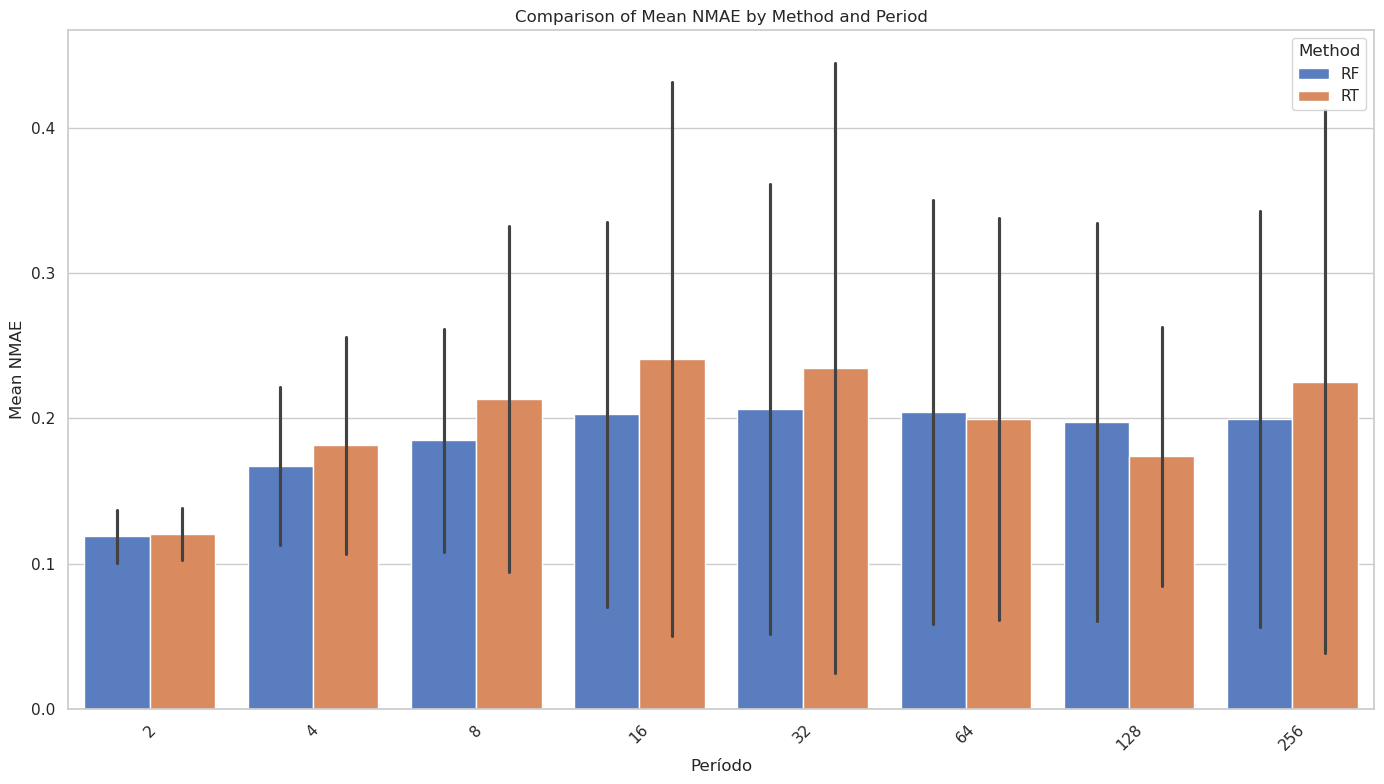

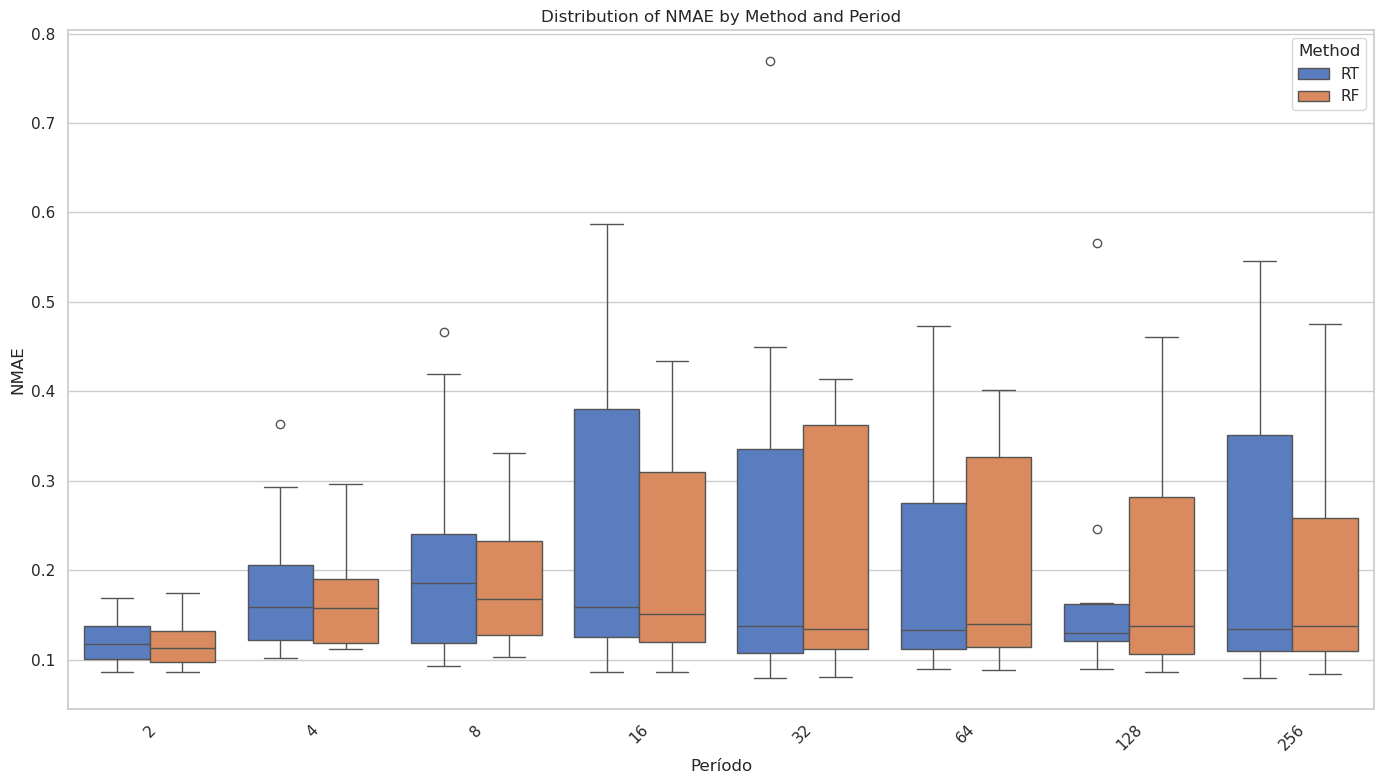

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

results = (
    data.groupby(["período", "função", "método"])
    .agg(mean_nmae=("nmae", "mean"), std_nmae=("nmae", "std"))
    .reset_index()
)

results["nmae_pm"] = results.apply(
    lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(x="período", y="mean_nmae", hue="método", data=results, ci="sd", palette="muted")

plt.xlabel("Período")
plt.ylabel("Mean NMAE")
plt.title("Comparison of Mean NMAE by Method and Period")
plt.legend(title="Method")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x="período", y="nmae", hue="método", data=data, palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE")
plt.title("Distribution of NMAE by Method and Period")
plt.legend(title="Method")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()